# Preparing Data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Reading our data
df = pd.read_csv("Social_Network_Ads.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [3]:
# Encoding 'Gender' column to binary to match the data
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
# Drop useless labels 'User ID'
df = df.drop('User ID', axis=1)
print(df)

     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


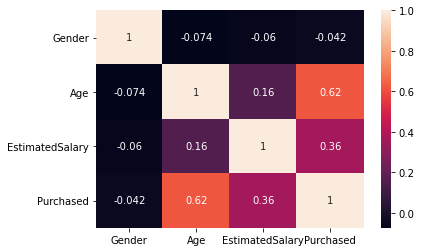

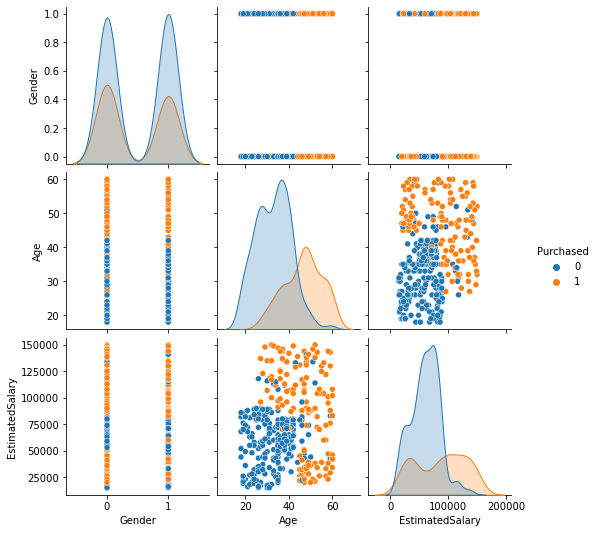

In [4]:
# show the heat map of our data and the relation between 'Purchased' and other labels
sns.heatmap(df.corr(), annot=True)
sns.pairplot(df, vars=df.columns[:-1], hue="Purchased")

In [5]:
# Set instanses 'x' and label 'y'
x = df.drop('Purchased', axis=1)
y = df['Purchased']
# Set 30% of dataSet as Testing data and 70% as Training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=5)

# KNN Classifier

In [6]:
# Set neighbors number and apply the algorithm on our data
n = KNeighborsClassifier(n_neighbors=5)
n.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
# Calculate predicted result in training data
pred1 = n.predict(x_train)
# Calculate the Accuracy for training data
print("Train data accuracy:", accuracy_score(y_train, pred1))
# Calculate Recall score for training data
print("Train_data Recall Score:",recall_score(y_train, pred1))

Train data accuracy: 0.8535714285714285
Train_data Recall Score: 0.6633663366336634


In [8]:
# Calculate predicted result in testing data
pred2 = n.predict(x_test)
# Calculate the Accuracy for testing data
print("Test data accuracy: ", accuracy_score(y_test, pred2))
# Calculate Recall score for testing data
print("Test_data Recall Score:",recall_score(y_test, pred2))

Test data accuracy:  0.8083333333333333
Test_data Recall Score: 0.5952380952380952


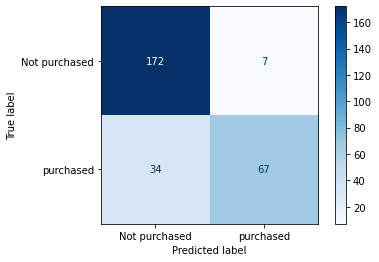

In [9]:
# Describe Actual results
disp = plot_confusion_matrix(n, x_train, y_train,
                             display_labels=['Not purchased', 'purchased'],
                             cmap=plt.cm.Blues)

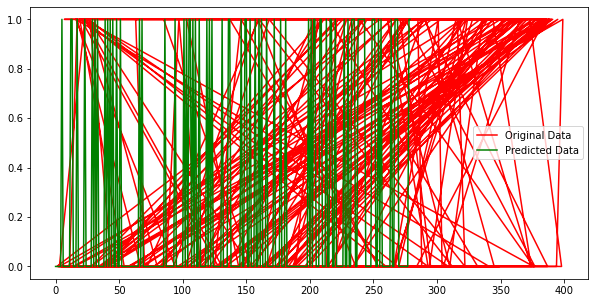

In [10]:
# Describe relation between original and predicted data
plt.figure(figsize=(10, 5))
plt.plot(y_train, color='r', label='Original Data')
plt.plot(pred1, color='g', label='Predicted Data')
plt.legend()
# Show all charts
plt.show()


# KNN Regressor

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [12]:
# Scalling training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [13]:
# Set neighbors number and apply the algorithm on our data
N = KNeighborsRegressor(n_neighbors=7)
N.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [14]:
# Calculate predicted result in training data
Pred1 = N.predict(X_train)
# Calculate the Accuracy for training data
print("Train data accuracy: ", accuracy_score(y_train, Pred1))
# Calculate predicted result in testing data
Pred2 = N.predict(X_test)
# Calculate the Accuracy for testing data
print("Test data accuracy: ", accuracy_score(y_test, Pred2))

Train data accuracy:  0.6392857142857142
Test data accuracy:  0.65
